In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data = titanic[["survived","pclass","sex","age","fare","alone"]].dropna()

# Convert categorical → numeric
data["sex"] = data["sex"].map({"male":0, "female":1})
data["alone"] = data["alone"].astype(int)

# Features (X) and target (y)
X = data.drop("survived", axis=1)
y = data["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [5]:
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7342657342657343

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        87
           1       0.66      0.66      0.66        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143



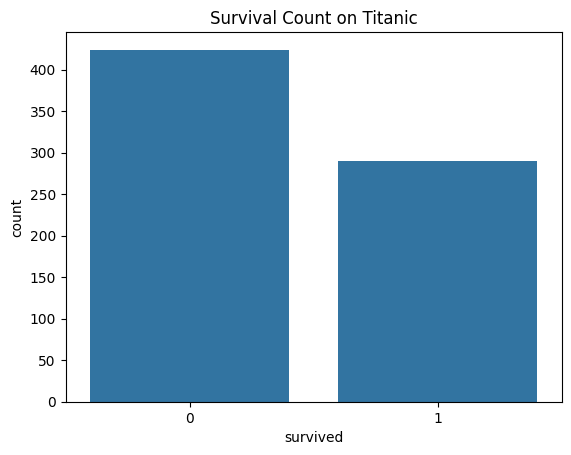

In [6]:
sns.countplot(x="survived", data=data)
plt.title("Survival Count on Titanic")
plt.show()